In [1]:
'''Bernstein-Varizani algorithm
Guessing number in box in one try'''
from qiskit import *

In [3]:
%matplotlib inline

In [4]:
from qiskit.tools.visualization import plot_histogram

In [44]:
secret_number='10011'
length=len(secret_number)

In [45]:
circuit = QuantumCircuit(length+1,length)
'''Here we add a plus one to the total number of bits.
One will be used as a registry to monitor the initial state'''
circuit.h(range(length))
circuit.x(length)
circuit.h(length)
circuit.barrier()

for i,bit in enumerate(secret_number[::-1]):
    if bit=='1':
        circuit.cx(i,length)
circuit.barrier()
circuit.h(range(length))
circuit.barrier()
circuit.measure(range(length),range(length))

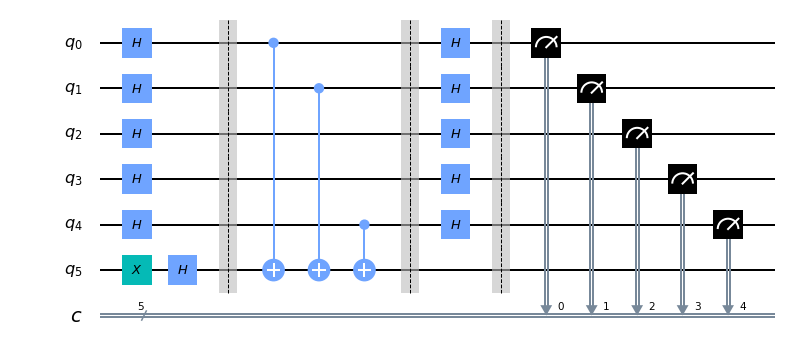

In [46]:
circuit.draw(output='mpl')

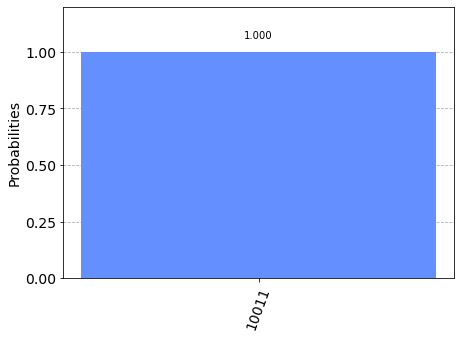

In [47]:
simulator = Aer.get_backend('qasm_simulator')
result=execute(circuit, backend=simulator, shots=1).result()
counts=result.get_counts()
plot_histogram(counts)

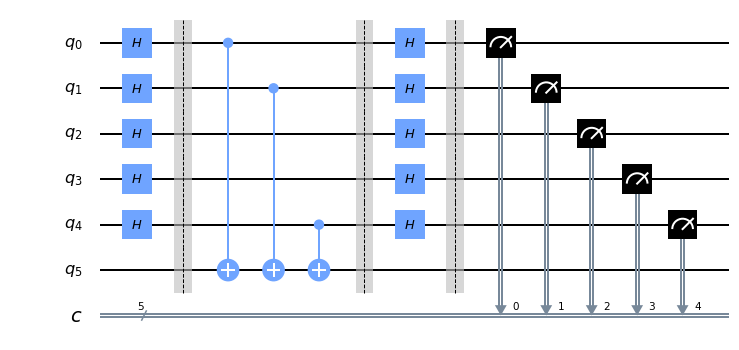

In [61]:
'''Resgister qbit =|0>'''
circuit = QuantumCircuit(length+1,length)
circuit.h(range(length))
circuit.barrier()

for i,bit in enumerate(secret_number[::-1]):
    if bit=='1':
        circuit.cx(i,length)
circuit.barrier()
circuit.h(range(length))
circuit.barrier()
circuit.measure(range(length),range(length))
circuit.draw(output='mpl')

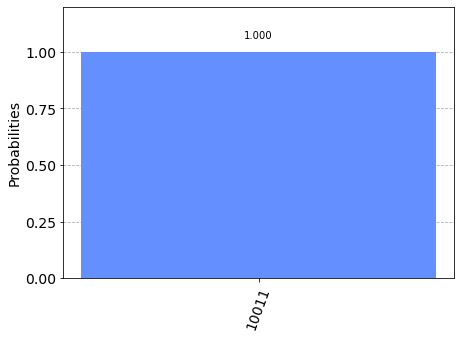

In [62]:
simulator=Aer.get_backend('qasm_simulator')
results=execute(circuit,simulator, shots=1).result()
counts=results.get_counts()
plot_histogram(counts)

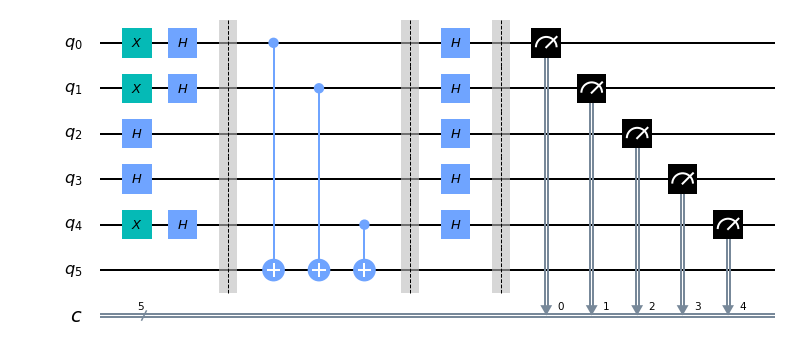

In [78]:
'''Resgiter qbit does not need to be |-> it can be |0> 
but how does cx'ing it flip the qbits in the hadamard state that it controls?
Also, the register bit is added for reversibility. All quantum bit opertaions need to be
reversible. If we feed |00000> to the Bernstein-Varizani algorithm we'll call f as such:
f(|00000>,'10011')=|10011> then f(|10011>,'10011')=|00000>'''
secret_number='10011'
circuit2 = QuantumCircuit(length+1,length)
for i,bit in enumerate(secret_number[::-1]): #flips the input so it matches secret_number
    if bit=='1':
        circuit2.x(i)
circuit2.h(range(length))
#circuit.x(length) no special registry
#circuit.h(length)
circuit2.barrier()

for i,bit in enumerate(secret_number[::-1]):
    if bit=='1':
        circuit2.cx(i,length)
circuit2.barrier()
circuit2.h(range(length))
circuit2.barrier()
circuit2.measure(range(length),range(length))
circuit2.draw(output='mpl')

In [79]:
simulator2=Aer.get_backend('qasm_simulator')

In [80]:
result2=execute(circuit2,simulator2,shots=1).result()

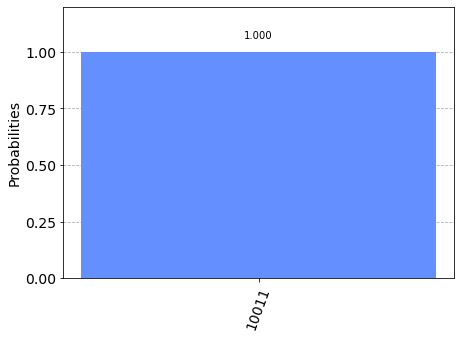

In [81]:
counts2=result2.get_counts()
plot_histogram(counts2)

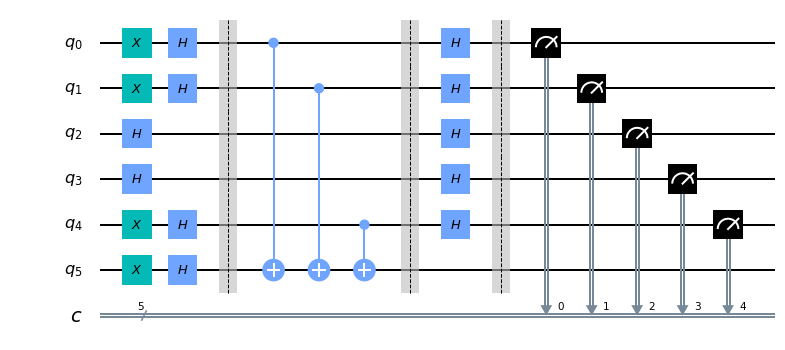

In [84]:
'''Not reversible but if we add the |-> register bit'''
secret_number='10011'
circuit2 = QuantumCircuit(length+1,length)
for i,bit in enumerate(secret_number[::-1]): #flips the input so it matches secret_number
    if bit=='1':
        circuit2.x(i)
circuit2.h(range(length))
circuit2.x(length) 
circuit2.h(length)
circuit2.barrier()

for i,bit in enumerate(secret_number[::-1]):
    if bit=='1':
        circuit2.cx(i,length)
circuit2.barrier()
circuit2.h(range(length))
circuit2.barrier()
circuit2.measure(range(length),range(length))
circuit2.draw(output='mpl')

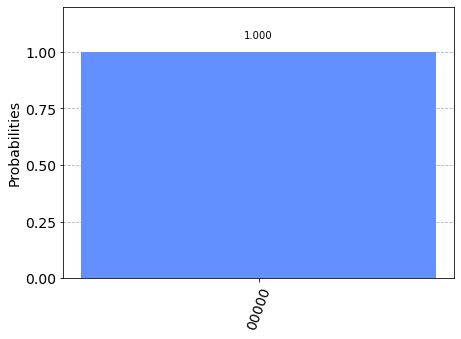

In [85]:
simulator2=Aer.get_backend('qasm_simulator')
result2=execute(circuit2,simulator2,shots=1).result()
counts2=result2.get_counts()
plot_histogram(counts2)

In [ ]:
'''It works but we still don't know how q6 being |->
affects the other bits probabilty and how this is a one shot operation. '''
